In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import numpy as np
import random
import math
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pandas.read_csv("/Users/dongxinhan/Documents/兼职任务/欧瑞4/作业/AmesHousing.txt",sep='\t', keep_default_na=False, na_values=[''])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
num_cols = [col for col in data.columns if col not in ['SalePrice'] if data[col].dtype!='object']
cat_cols = [col for col in data.columns if col not in ['SalePrice'] if data[col].dtype == 'object']

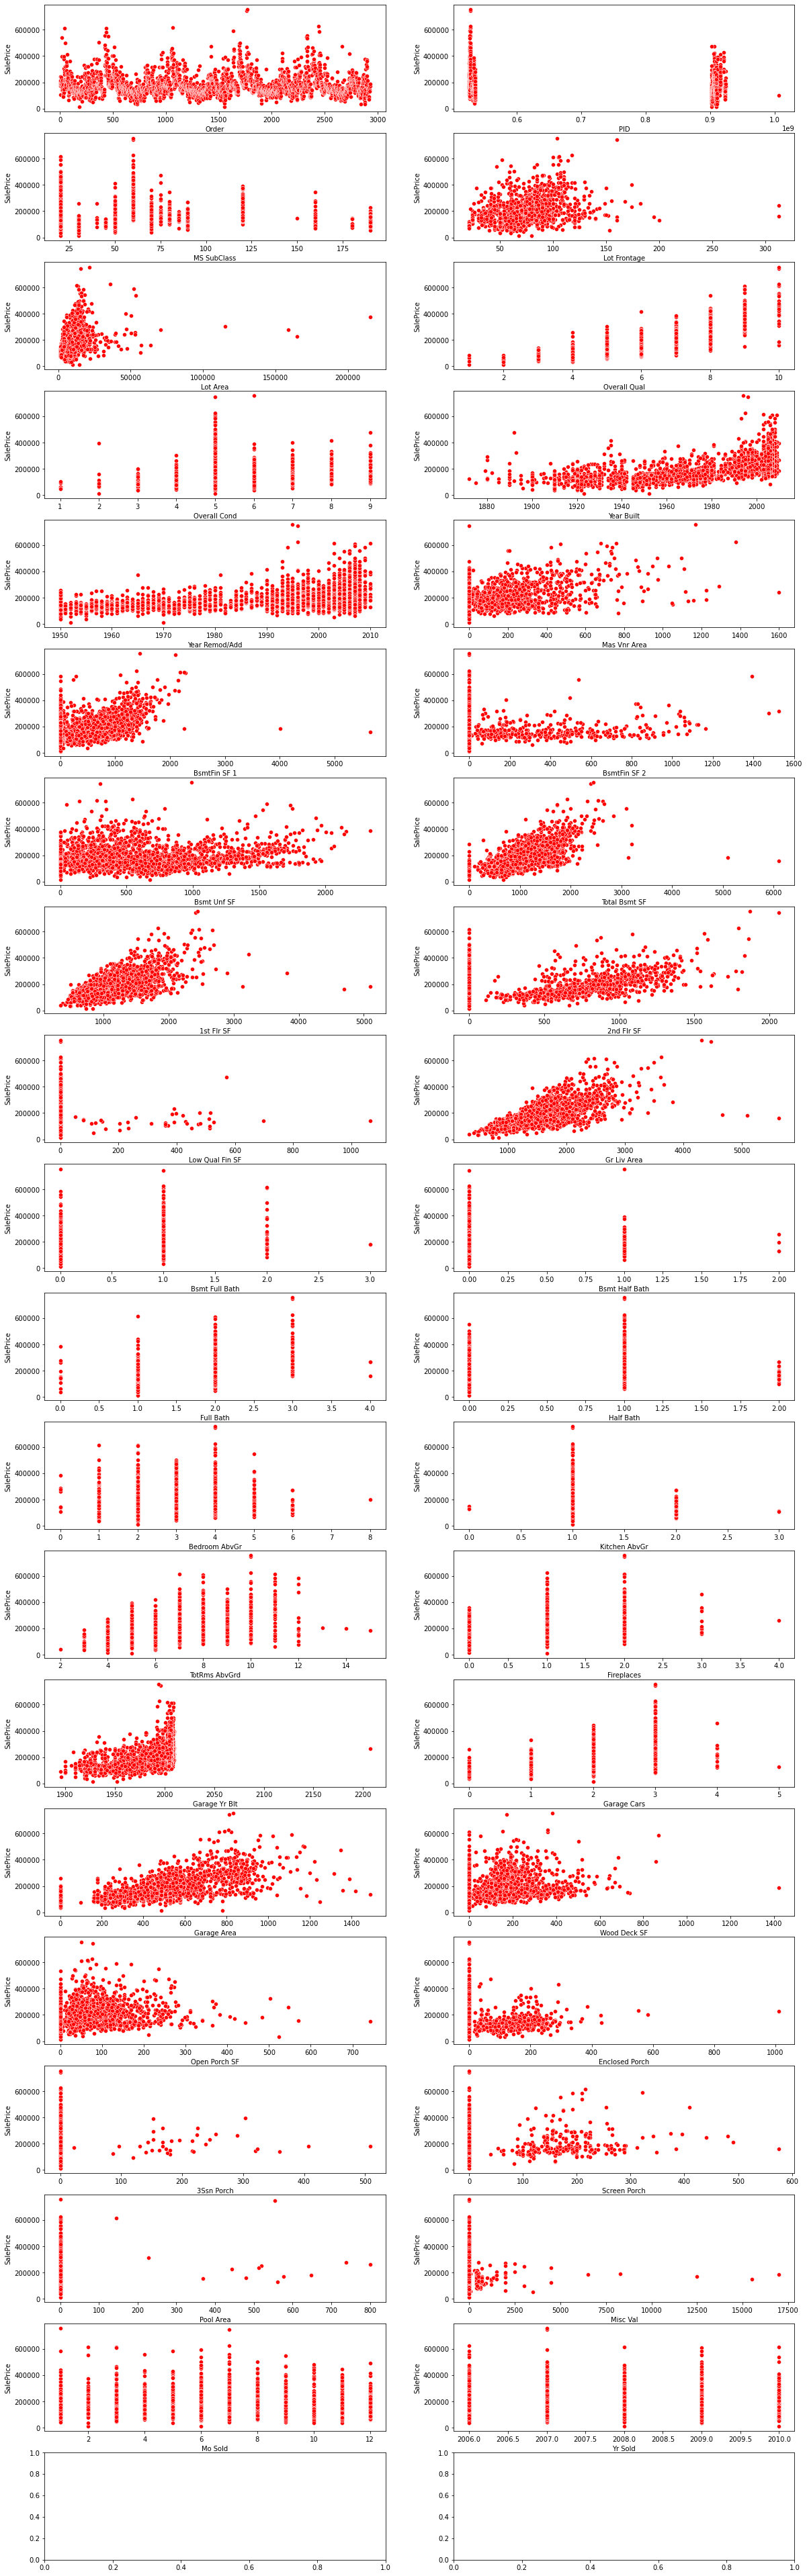

In [5]:
# 连续值特征

f, ax = plt.subplots(20, 2, figsize=(20, 70))
for i,name in enumerate(num_cols):
    sns.scatterplot(data=data, x=name, y='SalePrice', color='r', ax=ax[i // 2][i % 2])
plt.show()

In [6]:
num_cols.remove('Order')
num_cols.remove('PID')
num_cols.remove('Yr Sold')
num_cols.remove('Year Remod/Add')
num_cols.remove('Low Qual Fin SF')
num_cols.remove('Mas Vnr Area')
num_cols.remove('BsmtFin SF 2')
num_cols.remove('Pool Area')
num_cols.remove('Misc Val')
num_cols.remove('Lot Area')


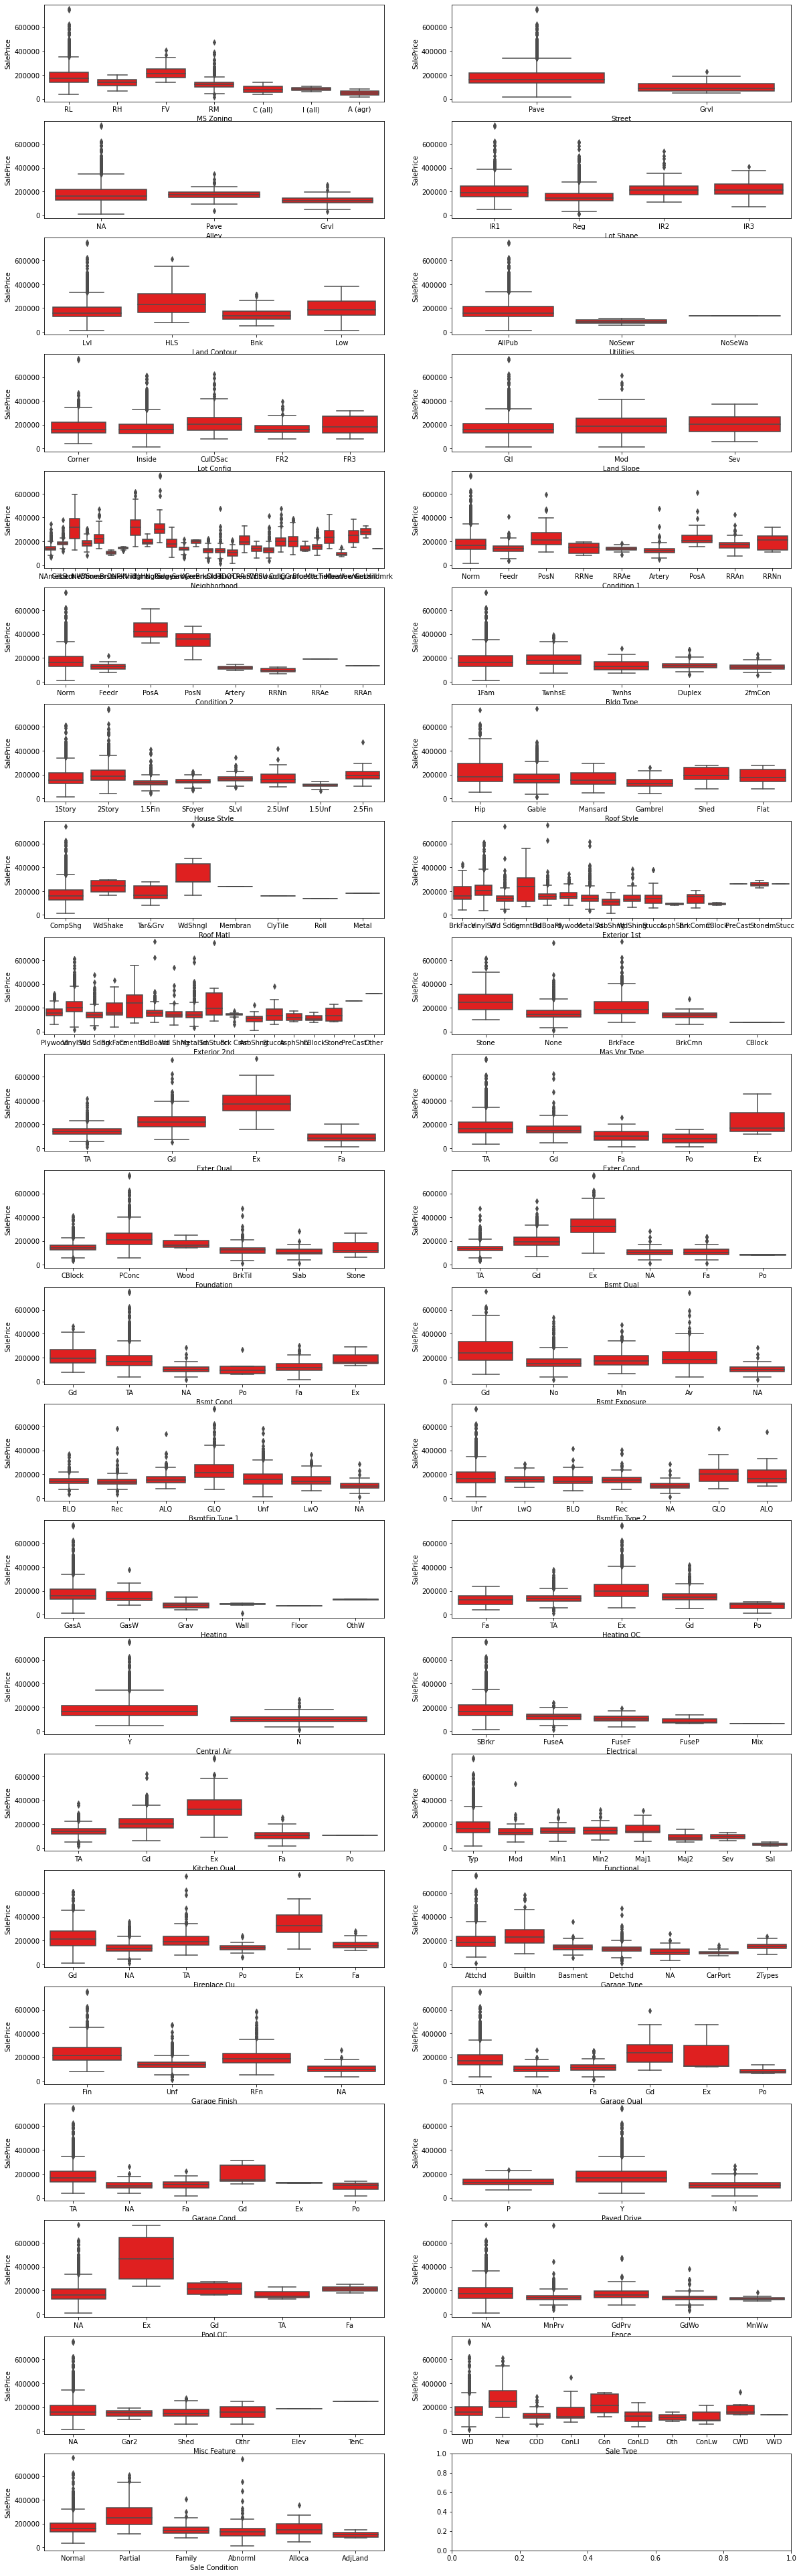

In [7]:
f, ax = plt.subplots(22, 2, figsize=(20, 70))
for i,name in enumerate(cat_cols):
    sns.boxplot(data=data, x=name, y='SalePrice', color='r', ax=ax[i // 2][i % 2])
plt.show()

In [8]:
cat_cols = ['MS Zoning','Street','Land Contour','Neighborhood','Condition 2','Roof Matl','Exter Cond','Fireplace Qu','Pool QC']

In [9]:
data = data[cat_cols+num_cols+['SalePrice']]
data.describe()

,MS SubClass,Lot Frontage,Overall Qual,Overall Cond,Year Built,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Mo Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,...,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,6.094881,5.563140,1971.356314,442.629566,559.262547,1051.614544,1159.557679,335.455973,...,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,6.216041,180796.060068
std,42.638025,23.365335,1.411026,1.111537,30.245361,455.590839,439.494153,440.615067,391.890885,428.395715,...,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,2.714492,79886.692357
min,20.000000,21.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12789.000000
25%,20.000000,58.000000,5.000000,5.000000,1954.000000,0.000000,219.000000,793.000000,876.250000,0.000000,...,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129500.000000
50%,50.000000,68.000000,6.000000,5.000000,1973.000000,370.000000,466.000000,990.000000,1084.000000,0.000000,...,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,6.000000,160000.000000
75%,70.000000,80.000000,7.000000,6.000000,2001.000000,734.000000,802.000000,1302.000000,1384.000000,703.750000,...,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,8.000000,213500.000000
max,190.000000,313.000000,10.000000,9.000000,2010.000000,5644.000000,2336.000000,6110.000000,5095.000000,2065.000000,...,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,12.000000,755000.000000


In [10]:
# data = data.fillna(method = 'mean')
from sklearn.impute import SimpleImputer
# import Imputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data['Garage Area'] = imp.fit_transform(data[['Garage Area']])
for col in list(num_cols):
#     print(col)
    ulimit=np.percentile(data[col].values, 99.9) #计算一个多维数组的任意百分比分位数
    llimit=np.percentile(data[col].values, 0.1)
#     print('1')
    data.loc[data[col]>ulimit,col]=ulimit  # 大于99.9%的直接赋值
    data.loc[data[col]<llimit,col]=llimit

Text(0.5, 1.0, 'Correlation coefficient of the variables')

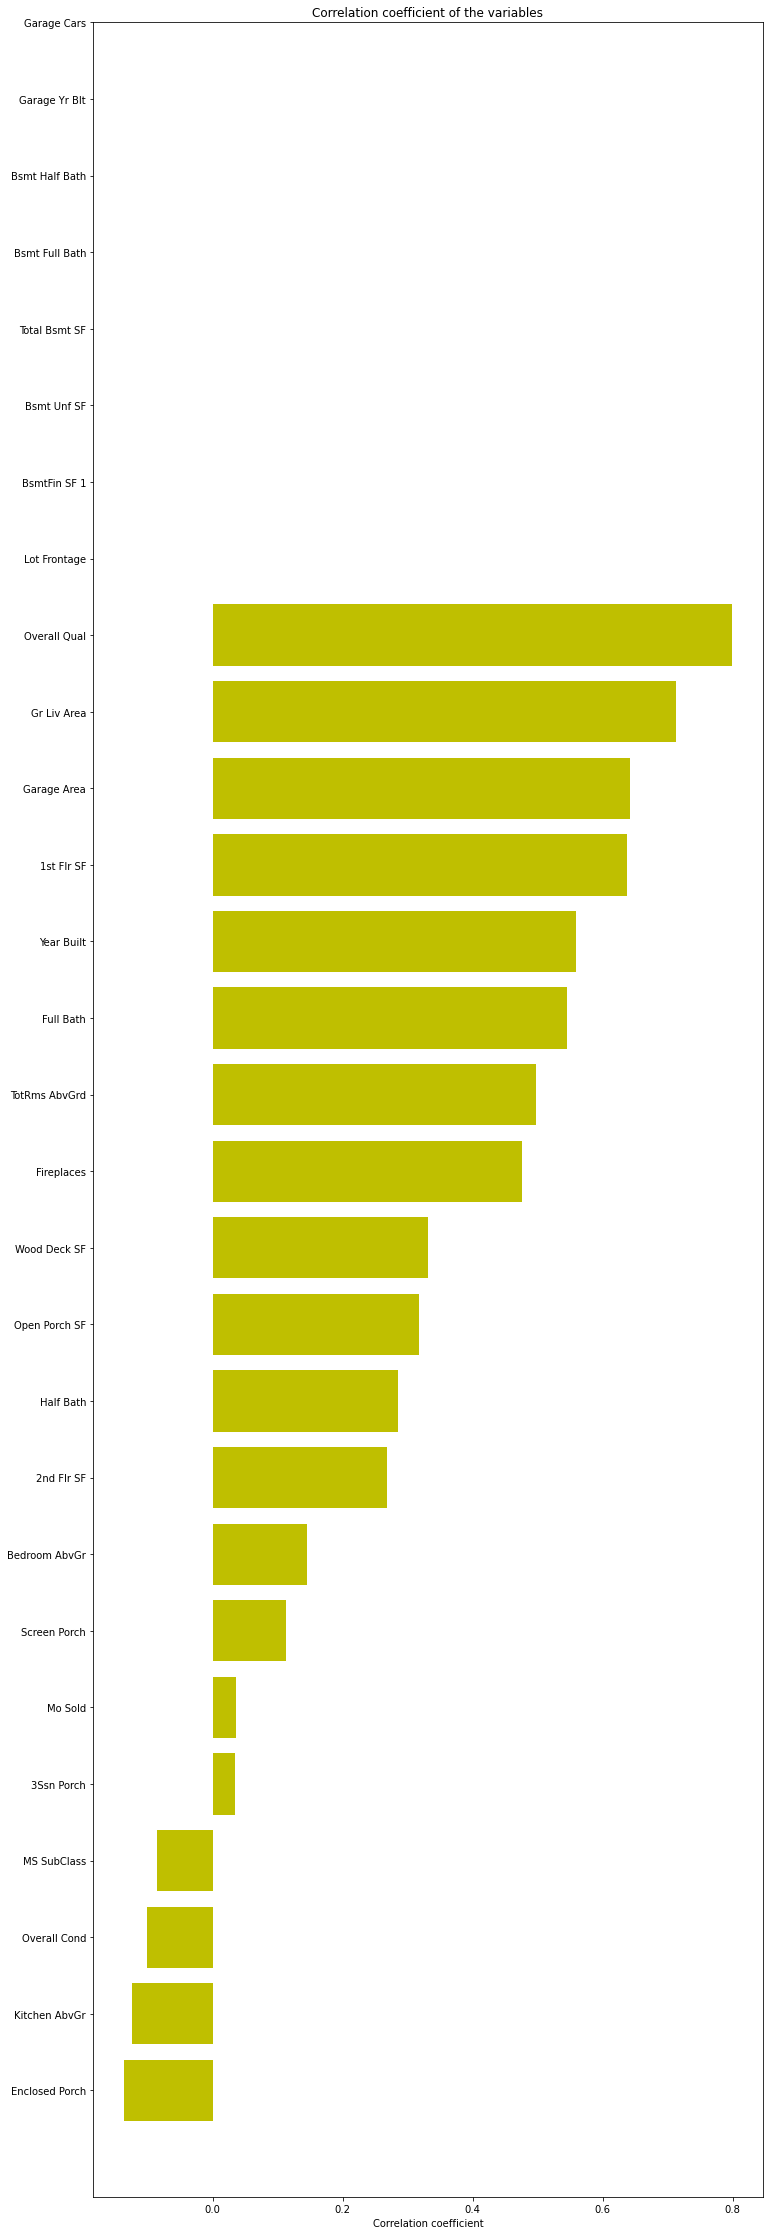

In [11]:


labels=[]
values=[]
for col in num_cols:
    labels.append(col)
    values.append(np.corrcoef(data[col].values,data['SalePrice'].values)[0,1])
corr_df=pd.DataFrame({'col_labels':labels,'corr_values':values})
corr_df=corr_df.sort_values(by='corr_values')

ind=np.arange(len(labels))
width=0.5
fig,ax=plt.subplots(figsize=(12,40))
rects=ax.barh(ind,corr_df.corr_values.values,color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values,rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')

In [12]:
num_cols_selected = list(corr_df[np.abs(corr_df['corr_values'])>0.5]['col_labels'])

In [13]:
def score(x):
    if x == 'Ex':
        return 6
    if x =='Gd':
        return 4
    if x == 'TA':
        return 3
    if x == 'Fa':
        return 2
    else:
        return 0
    
data['Exter Cond'] = data['Exter Cond'].apply(lambda x : score(x))
data['Fireplace Qu'] = data['Fireplace Qu'].apply(lambda x : score(x))

In [14]:
cat_cols_seleted = ['Exter Cond','Fireplace Qu','Neighborhood']
all_columns = ['SalePrice']+num_cols_selected+cat_cols_seleted
data = data[all_columns]

In [17]:
model = LinearRegression()
columns = list(data.columns)
columns.remove('SalePrice')
columns.remove('Neighborhood')
target_columns = 'SalePrice'
model.fit(data[columns],data[target_columns])
data['linearRegression'] = model.predict(data[columns])

In [18]:
data['linearRegression']

0       212956.491204
1       123503.252911
2       161599.828880
3       264386.977964
4       168026.138204
            ...      
2925    157157.289714
2926    122923.070117
2927    111583.233810
2928    167559.723561
2929    235776.565720
Name: linearRegression, Length: 2930, dtype: float64

In [27]:
# Calculate MSE for Model1
# pp=predict.reshape(-1)
error = []
# error.append(list(data['linearRegression']) - list(data['SalePrice']))
error = list(map(lambda x: x[0]-x[1], zip(data['linearRegression'], data['SalePrice'])))
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方
print("Model1 MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
print(model.coef_)
print(model.intercept_)
print(model.n_jobs)
columns


Model1 MSE =  1260551883.589609
[-7931.04851456   437.42970304    35.58624239    43.56098408
    49.80806145 20641.62286121  7575.39107782  3287.17325016]
-960612.4483932526
None


['Full Bath',
 'Year Built',
 '1st Flr SF',
 'Garage Area',
 'Gr Liv Area',
 'Overall Qual',
 'Exter Cond',
 'Fireplace Qu']

In [138]:
# Model2
columns_2 = ['SalePrice']+num_cols_selected
columns_2.remove('SalePrice')
# columns_2.remove('Neighborhood')
target_columns = 'SalePrice'
model.fit(data[columns_2],data[target_columns])
data['linearRegression_2'] = model.predict(data[columns_2])
error = []
# error.append(list(data['linearRegression']) - list(data['SalePrice']))
error = list(map(lambda x: x[0]-x[1], zip(data['linearRegression_2'], data['SalePrice'])))
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方
print("Model2 MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE

Model2 MSE =  1294764148.469801


In [139]:
# Model 3
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(max_depth=3)
x = data[columns]
y = data[target_columns]
dt_fit = DT.fit(x,y)
data['DTResult'] = dt_fit.predict(x)
error = []
# error.append(list(data['linearRegression']) - list(data['SalePrice']))
error = list(map(lambda x: x[0]-x[1], zip(data['DTResult'], data['SalePrice'])))
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方
print("Model3 MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE

Model3 MSE =  1678232414.7359104


In [140]:
# benchmark1
# np.mean(data['SalePrice'])
data['benchmark1'] = np.mean(data['SalePrice'])
error = []
# error.append(list(data['linearRegression']) - list(data['SalePrice']))
error = list(map(lambda x: x[0]-x[1], zip(data['benchmark1'], data['SalePrice'])))
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方
print("benchmark1 MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE

benchmark1 MSE =  6379705498.413448


In [141]:
# benchmark2
# np.mean(data['SalePrice'])

neighbored = data.groupby(by = data['Neighborhood'],as_index=False)
neighbored_mean = neighbored.mean()
neighbored_mean_price = neighbored_mean[['Neighborhood','SalePrice']]
data = pandas.merge(left = data, right = neighbored_mean_price, on = 'Neighborhood')
data = data.rename(columns = {'SalePrice_x':'SalePrice','SalePrice_y':'benchmark2'})
error = []
# # error.append(list(data['linearRegression']) - list(data['SalePrice']))
error = list(map(lambda x: x[0]-x[1], zip(data['benchmark2'], data['SalePrice'])))
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方
print("benchmark2 MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE

benchmark2 MSE =  2722366071.532515


In [15]:
all_columns

['SalePrice',
 'Full Bath',
 'Year Built',
 '1st Flr SF',
 'Garage Area',
 'Gr Liv Area',
 'Overall Qual',
 'Exter Cond',
 'Fireplace Qu',
 'Neighborhood']